In [1]:
#Importing libraries

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
digits = load_digits()

In [2]:
# To determine total no. of images and labels

print("Image data shape", digits.data.shape)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


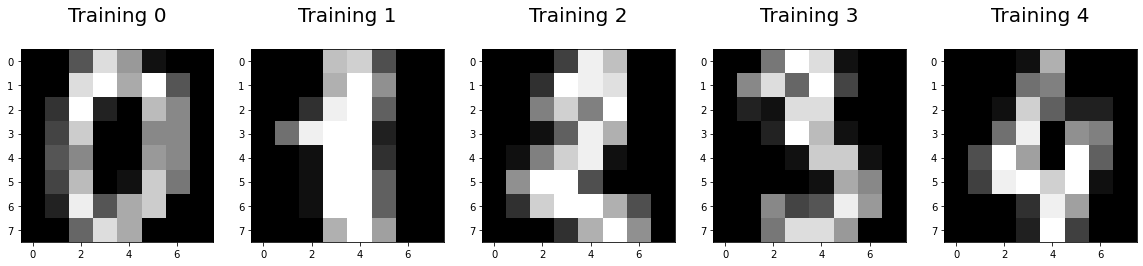

In [3]:
#Displaying some of the images and labels

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training %i\n' % label, fontsize = 20)

In [4]:
#Split the dataset into train and test sets

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1383, 64)
(414, 64)
(1383,)
(414,)


In [5]:
# Model creation - Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\Dinoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
#for prediction

pred = lr.predict(x_test)

In [7]:
#to find accuracy 

acc = lr.score(x_test, y_test)
print(acc)

0.9516908212560387


In [10]:
#Confusion matrix

cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


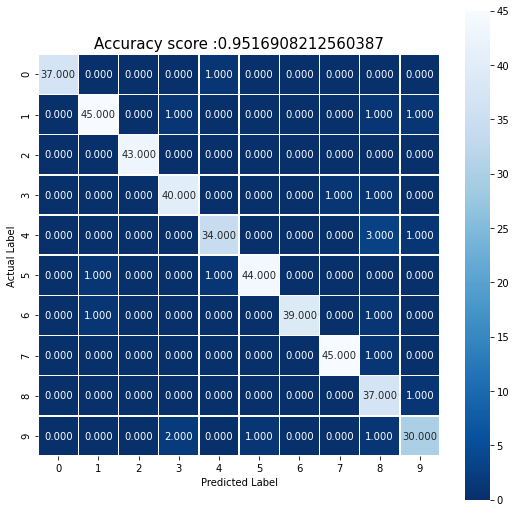

In [12]:
#Data visualizing with confusion matrix using heatmap

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidth = 0.5, square = True, cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy score :{0}'.format(acc)
plt.title(all_sample_title, size = 15);

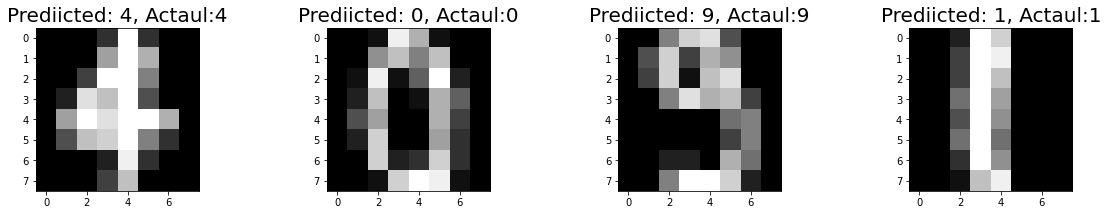

In [14]:
index = 0
classifiedIndex = []
for predict, actual in zip(pred, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title('Prediicted: {}, Actaul:{}'.format(pred[wrong], y_test[wrong]), fontsize = 20)